<a href="https://colab.research.google.com/github/yairrinat/Survey_Analysis/blob/main/survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this short script I plan to analyze the survey data we got from the WMO

# **This is a new version**


In [4]:
# load and install pakages
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Loading excels:

In [17]:
# link to excel file:
url_world = "https://github.com/yairrinat/Survey_Analysis/blob/main/WMO_SURVEY.xlsx?raw=true"
url_pop = "https://github.com/yairrinat/Survey_Analysis/blob/main/world_pop_all.xlsx?raw=true"
url_country_area = "https://github.com/yairrinat/Survey_Analysis/blob/main/country_area_new.xlsx?raw=true"
url_staff_reduced = "https://github.com/yairrinat/Survey_Analysis/blob/main/WMO%20Hydrology%20Survey_Staff_reduced.xlsx?raw=true"
url_GDP = "https://github.com/yairrinat/Survey_Analysis/blob/main/GDP_PPP.xlsx?raw=true"

#load personal data:
df_personal = pd.read_excel(url_world,index_col = 0,header = 0, sheet_name = "Person details")
df_personal = df_personal.iloc[1:,:] # remove first row
#print(df_personal)

#load staff data:
df_staff = pd.read_excel(url_world,index_col=0,header = 0, sheet_name = "STAFF")
list_ind = df_staff.index.to_list()
list_ind[0] = "secondary_title"
df_staff.index= list_ind
df_staff.head(10)

#load reduced staff data
df_staff_reduced = pd.read_excel(url_staff_reduced,index_col=0,header = 0, sheet_name = "STAFF")
list_ind = df_staff_reduced.index.to_list()
list_ind[0] = "secondary_title"
df_staff_reduced.index= list_ind
df_staff_reduced.head(10)

#load ... to be continued later

#load population data:
df_pop = pd.read_excel(url_pop)
# select only the population density and YEAR 2020:
df_pop = df_pop[df_pop['Year'] == 2019]
df_pop = df_pop[df_pop['Series'] == "Population density"]
df_pop.drop(["Region/Country/Area","Footnotes","Source", "Series", "Year"],axis = 1, inplace = True)
df_pop.rename(columns={"Population, density and surface area"	: "Country", "Value" : "pop_density_2019"}, inplace = True)
df_pop.set_index("Country",inplace = True)

#load GNI = gross national income previously gross national product
df_gpd_ppp = pd.read_excel(url_GDP,index_col = 0, header = 3)
df_gpd_ppp = df_gpd_ppp["2019"] # in $ 

df = pd.concat([df_staff,df_pop])


df

Country Name
Aruba                    NaN
Afghanistan     8.203398e+10
Angola          2.216795e+11
Albania         4.059829e+10
Andorra                  NaN
                    ...     
Kosovo          2.129915e+10
Yemen, Rep.              NaN
South Africa    7.632581e+11
Zambia          6.472882e+10
Zimbabwe        4.337177e+10
Name: 2019, Length: 264, dtype: float64

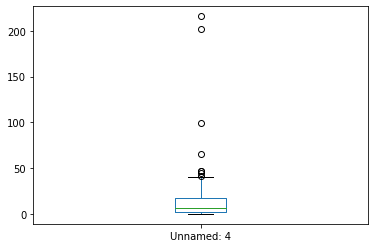

In [80]:
aa = df_staff_reduced.iloc[1:,3]
print(aa.head())

def identity_total_personal(x_in):
  """ This funciton identify the numbers in each cell of an input dataframe,
   turns them to integers and returns their sum"""
  try:
    if type(x_in) == int or type(x_in) == float:
      return x_in
    list_nums = re.findall(r"\d+",x_in)
    list_nums2 = [int(x) for x in list_nums]
    return sum(list_nums2)
  except:
    return float("NAN")
# return re.findall(r"\d+",df)

# sum the numbers in each cell:
#if aa will be a df then I should change the map to applymap !!
new = aa.map(identity_total_personal)
print(new.head())
# drop nans:
new.dropna(inplace = True)
print(new.head())
# now for the plotting:

plt.figure()
new.plot(kind = "hist", bins = 50)
new.plot(kind = "box")
new.plot(kind = "box", ylim =(0,50) )


plt.violinplot(new)

sns.displot(new, kind="hist", binwidth = 5)

# new.head()
# # test:
# a = re.findall(r"\d+","3 jh 32" )
# print(a)
# sum([int(a[0]) , int(a[1])])

# identity_total_personal("aa")


# type(df_staff[1:,3])

